# Handwriting Pattern Recognition Using K-Means Clustering

A project for my Codecademy Certified Data Scientist: Machine Learning Specialist certification course.

Data used is a copy from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits). 

Robert Hall

12/26/2024

### 1. Load Dataset And Its Description + Look At Data And Targets

In [3]:
from sklearn import datasets
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [30]:
print(digits.target)

[0 1 2 ... 8 9 8]


TARGET AT IMAGE INDEX 100: 4
IMAGE AT INDEX 100: 


<Figure size 640x480 with 0 Axes>

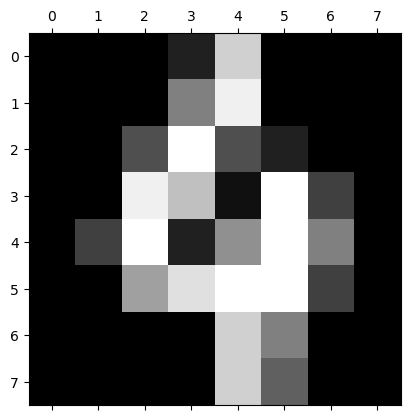

In [10]:
import matplotlib.pyplot as plt

# Test 123
print(f"TARGET AT IMAGE INDEX 100: {digits.target[100]}")
print(f"IMAGE AT INDEX 100: ")
plt.gray()
plt.matshow(digits.images[100])
plt.show()

### 2. Build Scikit-Learn KMeans Clustering Model 
##### with k = 10 for ten possible digits (0, 1, 2, ..., 9)

In [11]:
# build model at k = 10
k = 10
from sklearn.cluster import KMeans 
model = KMeans(n_clusters = k, random_state = 42)

In [17]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# fit data to model
model.fit(digits.data)

KMeans(n_clusters=10, random_state=42)

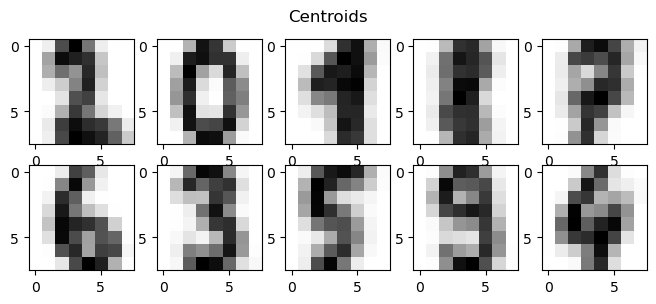

In [28]:
# visualize cluster centers
fig = plt.figure(figsize=(8, 3))
fig.suptitle("Centroids")
for i in range(10):
  ax = fig.add_subplot(2, 5, 1+i)
  ax.imshow(model.cluster_centers_[i].reshape((8,8)), cmap=plt.cm.binary)
plt.show()

### 3. Test Model On New Sample

The array below represents handwritten digits [2, 0, 5, 4] corresponding to the number '2054', written by yours truly, through a web application hosted by Codecademy. 

In [25]:
import numpy as np
new_samples = np.array([
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.18,6.86,6.48,0.38,0.00,0.00,0.00,0.00,3.13,5.34,7.62,0.76,0.00,0.00,0.00,0.00,0.00,3.13,7.62,0.76,0.00,0.00,0.00,0.00,0.00,4.88,7.47,3.74,4.42,0.38,0.00,0.00,2.95,7.63,7.62,7.63,6.33,0.69,0.00,0.54,7.55,7.02,4.19,0.84,0.00,0.00,0.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,1.52,1.75,2.21,0.46,0.00,0.00,0.00,3.59,7.62,7.62,7.62,7.32,3.20,0.00,0.00,3.81,7.62,1.91,2.13,6.33,6.86,0.00,0.00,3.43,7.62,5.80,4.65,7.47,4.81,0.00,0.00,0.31,3.97,5.79,6.10,5.57,0.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,3.89,5.72,5.49,0.00,0.00,0.00,0.00,2.06,7.62,6.79,3.21,0.00,0.00,0.00,0.00,0.30,6.71,7.09,0.61,0.00,4.20,4.88,3.28,4.19,6.71,7.63,1.15,0.00,3.51,7.17,7.62,7.09,5.64,2.52,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.98,2.52,1.15,4.20,0.15,0.00,0.00,0.00,6.10,5.41,3.05,7.62,0.76,0.00,0.00,0.00,5.34,7.09,5.79,7.62,0.76,0.00,0.00,0.00,2.98,6.10,6.71,7.62,0.76,0.00,0.00,0.00,0.00,0.00,3.05,7.62,0.76,0.00,0.00,0.00,0.00,0.00,3.05,7.62,0.76,0.00,0.00,0.00,0.00,0.00,3.05,7.62,0.76,0.00]
])

In [26]:
# get predicted labels for the new samples
new_labels = model.predict(new_samples)

In [27]:
# translate new labels into corresponding indices in the cluster centers
for i in range(len(new_labels)):
  if new_labels[i] == 0:
    print(2, end='')
  elif new_labels[i] == 1:
    print(0, end='')
  elif new_labels[i] == 2:
    print(1, end='')
  elif new_labels[i] == 3:
    print(8, end='')
  elif new_labels[i] == 4:
    print(7, end='')
  elif new_labels[i] == 5:
    print(6, end='')
  elif new_labels[i] == 6:
    print(3, end='')
  elif new_labels[i] == 7:
    print(5, end='')
  elif new_labels[i] == 8:
    print(9, end='')
  elif new_labels[i] == 9:
    print(4, end='')


5471

### Overall Thoughts

Clearly, either I have terrible handwriting, or the model is not performing well. More tuning and training will likely be done in the future to increase performance. 